## Global

Ce fichier a pour objectif de visualiser de manière globale les différents mésures effectuées sur le EEE afin de rechercher des patterns dans nos données. Pour ce faire nous avons utilisé des graphiques matplolib et seaborn.
Cependant les différents graphiques obtenus ne font ressortir aucun pattern particulier.

## I- Data Cleaning 
le but de cette section est le prétraitement des données et leur nettoyage afin qu'elles puissent être exploitables convenablement.

In [148]:
#importing pandas as pd

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("./data/data_csv/Resume.csv")
#df = df.dropna(subset = ['Nombre','Moyenne Hauteur','Moyenne Nf'])
print(df.info())
print(df.isna().sum())
#Remplacer les NaN par 0 et conversion des valeurs des colonnes 
df.fillna(0,inplace = True)
df['Moyenne Hauteur'] = df['Moyenne Hauteur'].astype(float)
df['Moyenne Nf'] = df['Moyenne Nf'].astype(float)
df['Nombre'] = df['Nombre'].astype(float)
print(df.columns)
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
Date                  189 non-null object
Station               189 non-null object
Traitement            189 non-null object
Compost               189 non-null object
Réplicat              189 non-null object
Nombre                189 non-null int64
Moyenne Hauteur       111 non-null float64
Moyenne Nf            111 non-null float64
Ecart-type Hauteur    12 non-null float64
Ecart-type Nf         12 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.8+ KB
None
Date                    0
Station                 0
Traitement              0
Compost                 0
Réplicat                0
Nombre                  0
Moyenne Hauteur        78
Moyenne Nf             78
Ecart-type Hauteur    177
Ecart-type Nf         177
dtype: int64
Index(['Date', 'Station', 'Traitement', 'Compost', 'Réplicat', 'Nombre',
       'Moyenne Hauteur', 'Moyenne Nf', 'Ecart-type Hauteur'

Date Station Traitement Compost Réplicat  Nombre  Moyenne Hauteur  \
0  06.2021      1M        NA1    Sans        A    12.0        15.583333   
1  06.2021      1M        NA1    Sans        B     9.0        16.444444   
2  06.2021      1M        NA1    Sans        C     7.0        15.000000   
3  06.2021      1M    NA1+Sol    Avec        A     4.0        21.875000   
4  06.2021      1M    NA1+Sol    Avec        B     0.0         0.000000   
5  06.2021      1M    NA1+Sol    Avec        C     0.0         0.000000   
6  06.2021      1M        NA2    Sans        A     4.0        28.100000   
7  06.2021      1M        NA2    Sans        B     6.0        33.333333   
8  06.2021      1M        NA2    Sans        C     2.0        47.000000   
9  06.2021      1M    NA2+Sol    Avec        A     4.0        24.000000   

   Moyenne Nf  Ecart-type Hauteur  Ecart-type Nf  
0   48.583333            9.119991      35.752834  
1   42.555556            7.699206      21.313793  
2   38.571429            6.271629      24.425787  
3  112.500000           13.591511      95.935742  
4    0.000000            0.000000       0.000000  
5    0.000000            0.000000       0.000000  
6  300.750000           23.632040     326.579623  
7  125.333333           18.925292      85.450961  
8  195.000000           42.426407     233.345238  
9   62.750000            2.828427      29.273139

###### Removal of NaN and creation of the global dataframe

## II- data Visualization

##### visualize the evolution of the plants according to the treatment on each date



### Evolution de la hauteur moyenne des EEE par traitement

Traitement
Invasives    23.726337
NA1          18.796726
NA1+Sol      16.420635
NA2          37.191845
NA2+Sol      21.421605
Sol          36.709266
Témoin       31.612037
Name: Moyenne Nf, dtype: float64
Traitement
Invasives    208.000000
NA1           64.000000
NA1+Sol      112.500000
NA2          300.750000
NA2+Sol       91.666667
Sol          286.666667
Témoin       130.000000
Name: Moyenne Nf, dtype: float64


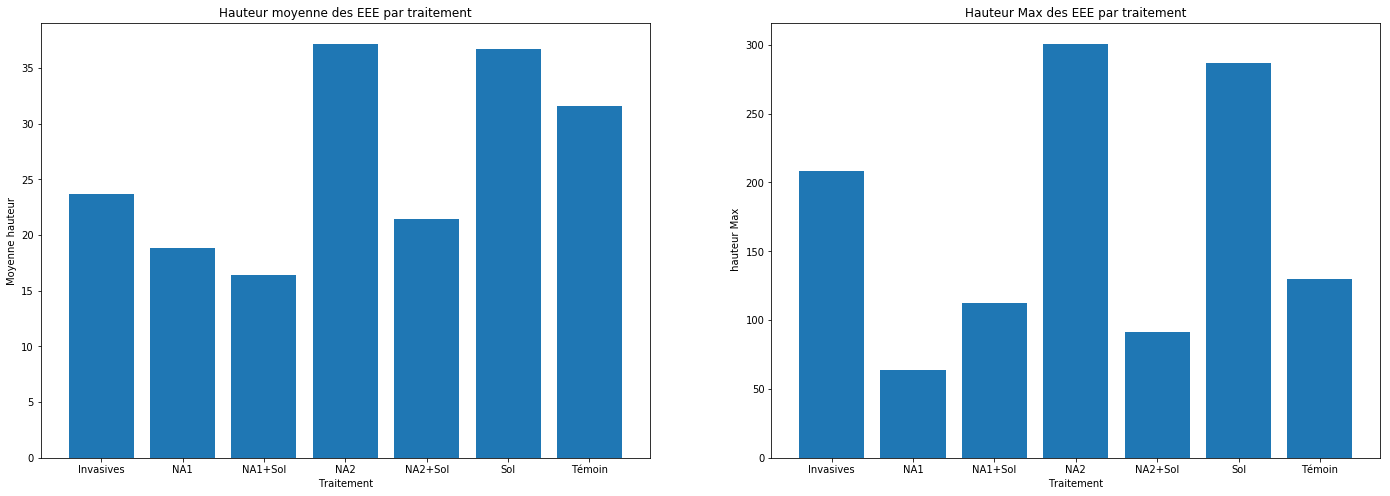

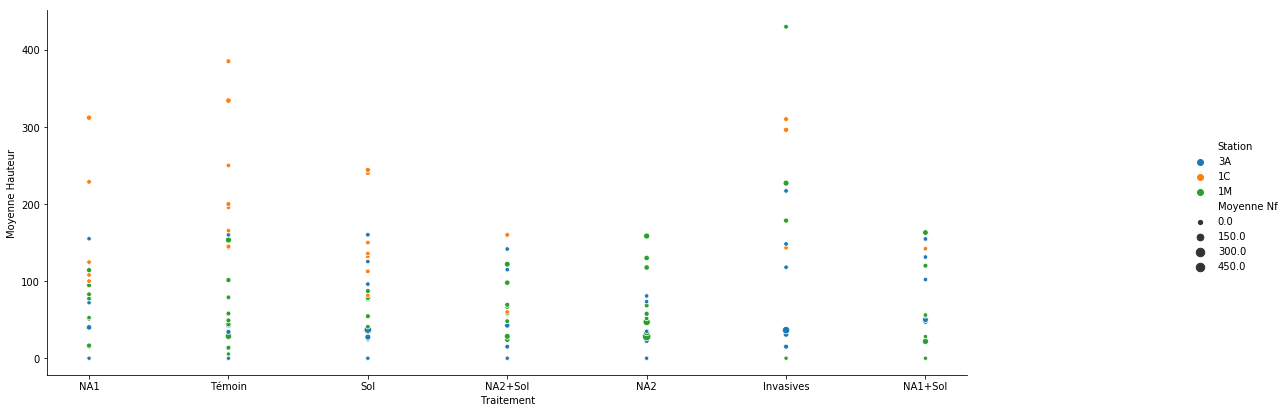

In [149]:
# Hauteur des EEE
# Order the dataframe in ascending order of plant height 
df1 = df.sort_values(by = ['Moyenne Hauteur'],ascending = True)

mean_H = df1.groupby('Traitement')['Moyenne Nf'].mean()
max_H = df1.groupby('Traitement')['Moyenne Nf'].max()
print(mean_H)
print(max_H)

fig=plt.figure(figsize=(24,8)) 
plt.subplot(1,2,1)

plt.bar( list(mean_H.keys()), mean_H.values, label='Nb feuilles', linewidth = 3) 
plt.xlabel('Traitement') 
plt.ylabel('Moyenne hauteur') 
plt.title('Hauteur moyenne des EEE par traitement') 

plt.subplot(1,2,2)
plt.bar( list(max_H.keys()), max_H.values, label='Nb feuilles', linewidth = 3) 
plt.xlabel('Traitement') 
plt.ylabel(' hauteur Max') 
plt.title('Hauteur Max des EEE par traitement') 


g = sns.relplot(x='Traitement', y='Moyenne Hauteur', hue='Station', size='Moyenne Nf', data=df1)
g.fig.set_size_inches(20, 6)


#NB : il est possible de zoomer en double cliquant sur les figurent

Index(['04.11.2021', '06.2021', '23.05.2022'], dtype='object', name='Date')
[154.36904761904765, 90.18708452128205, 45.50462962962962, 44.74629629666667, 63.851851852222225, 82.86358826321789, 126.68121693121694]


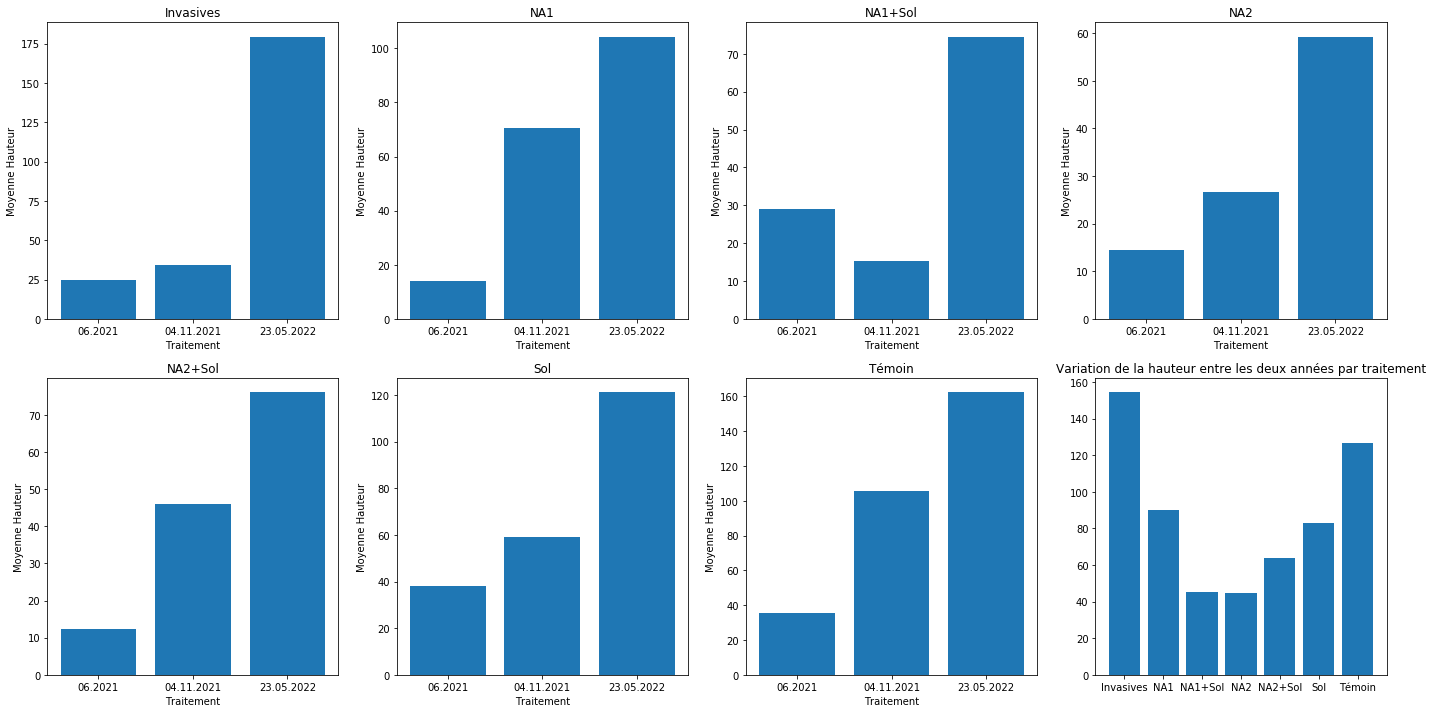

In [150]:
# Regrouper les mesures par Traitement et sommer par date
sum_nf = df1.groupby(['Traitement', 'Date'])['Moyenne Hauteur'].mean()


print((sum_nf.loc['NA1']).keys())
# Afficher l'évolution dans un graphique en barre 
i=1
j = 0
var=[]
fig=plt.figure(figsize=(24,12)) 
for t,d in list(sum_nf.keys()) :
    if((j%3)==0) :
        plt.subplot(2,4,i)
        X = [(sum_nf.loc[t]).keys()[1],(sum_nf.loc[t]).keys()[0],(sum_nf.loc[t]).keys()[2]] 
        Y = [(sum_nf.loc[t]).values[1],(sum_nf.loc[t]).values[0],(sum_nf.loc[t]).values[2]]
        var.append((sum_nf.loc[t]).values[2] - (sum_nf.loc[t]).values[1])
        plt.bar( X, Y, label='Moyenne hauteur', linewidth = 3) 
        plt.xlabel('Traitement') 
        plt.ylabel('Moyenne Hauteur') 
        plt.title(t) 
        i+=1
    j+=1
plt.subplot(2,4,8)
plt.bar( list(mean_H.keys()), var, label='Moyenne hauteur', linewidth = 3)
plt.title("Variation de la hauteur entre les deux années par traitement") 
print(var)

#### Interprétation : évolution de la hauteur
On constate que la hauteur moyenne est de 160 cm pour les parcelles témoins et 175cm pour les invasives. 
Les graphiques ci-dessus nous montrent que toutes les traitements avec espèce allélopatique freine l'évolution des EEE en terme de hauteur. Mais ce sont les traitement **NA1 avec compost, et NA2** qui sont les plus efficaces avec un ralentissement de plus de **50%**.

### Evolution du nombre totale des feuilles par traitement

#### Vue d'ensemble du nombre de feuilles par traitement 

Traitement
Invasives     640.611111
NA1           507.511600
NA1+Sol       443.357143
NA2          1004.179825
NA2+Sol       578.383333
Sol           991.150180
Témoin        853.525000
Name: Moyenne Nf, dtype: float64


Text(0.5,1,'Nombre de feuilles des EEE par traitement')

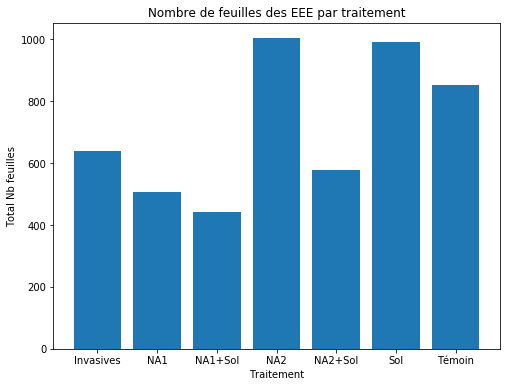

In [151]:
sum_nf = df1.groupby('Traitement')['Moyenne Nf'].sum()


print(sum_nf)
plt.figure(figsize=(8, 6))
plt.bar( list(sum_nf.keys()), sum_nf.values, label='Nb feuilles', linewidth = 3) 
plt.xlabel('Traitement') 
plt.ylabel('Total Nb feuilles') 
plt.title('Nombre de feuilles des EEE par traitement') 



#### Regroupement du nombre totale de feuilles par Traitement et sommer par date

Index(['04.11.2021', '06.2021', '23.05.2022'], dtype='object', name='Date')
[-72.45555555555558, -31.409035408717926, -122.5, -441.9166666333334, -31.616666669999972, -448.4701299034632, -2.6535714285714107]


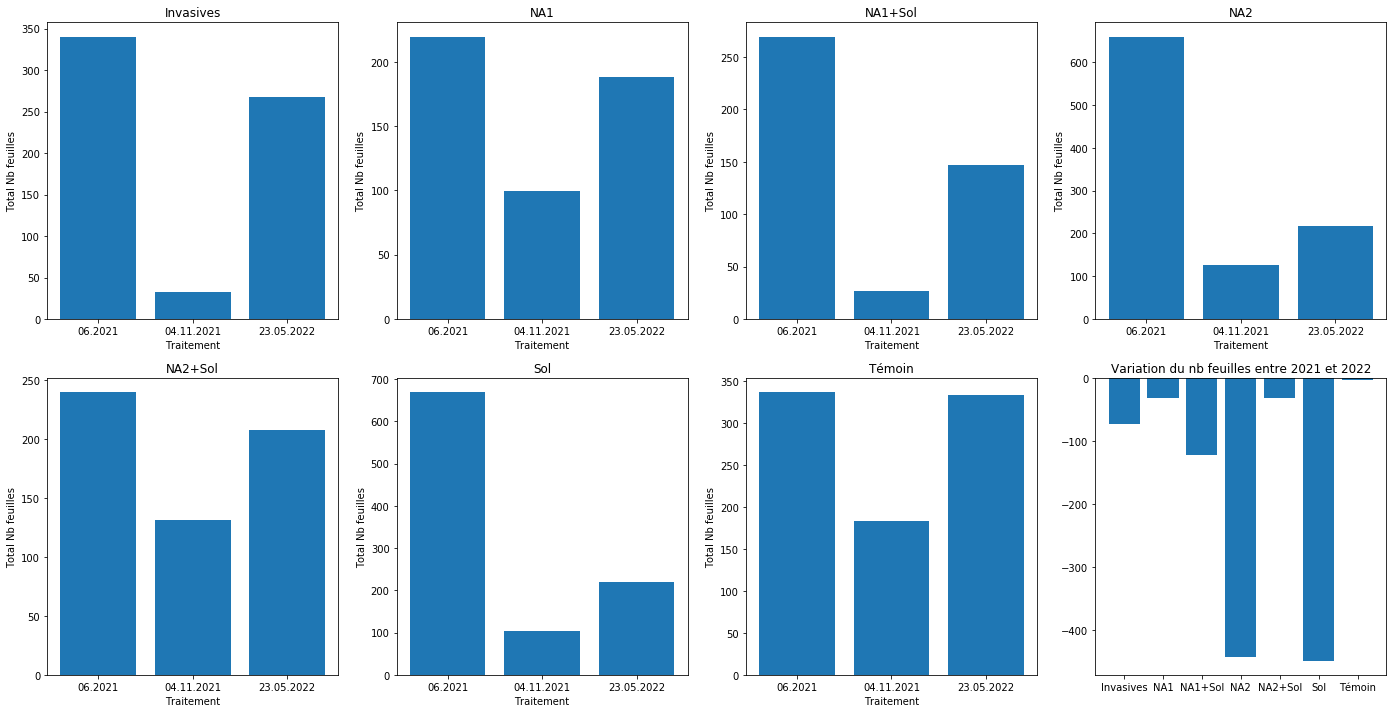

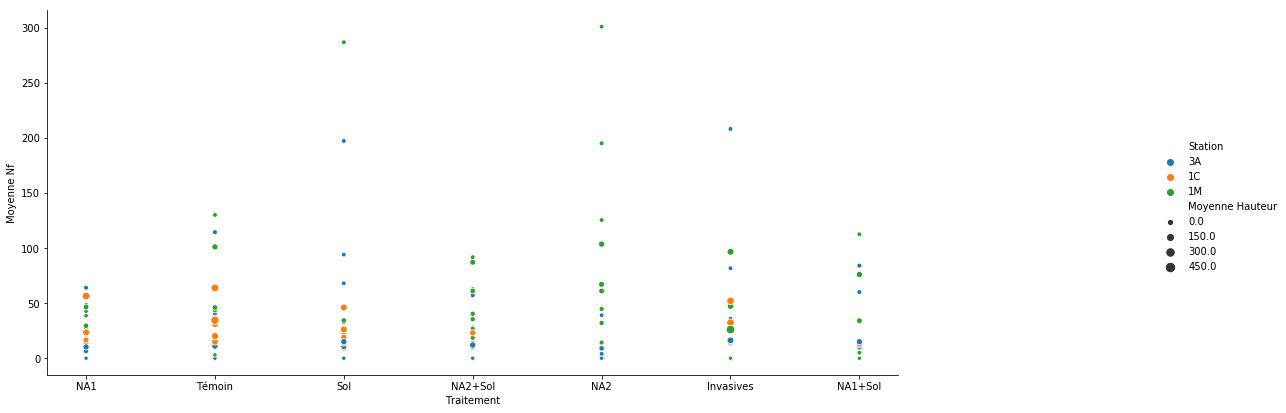

In [160]:
# Regrouper les mesures par Traitement et sommer par date
sum_nf = df1.groupby(['Traitement', 'Date'])['Moyenne Nf'].sum()


print((sum_nf.loc['NA1']).keys())
# Afficher l'évolution dans un graphique en barre 
i=1
j = 0
var=[]
fig=plt.figure(figsize=(24,12)) 
for t,d in list(sum_nf.keys()) :
    if((j%3)==0) :
        plt.subplot(2,4,i)
        X = [(sum_nf.loc[t]).keys()[1],(sum_nf.loc[t]).keys()[0],(sum_nf.loc[t]).keys()[2]] 
        Y = [(sum_nf.loc[t]).values[1],(sum_nf.loc[t]).values[0],(sum_nf.loc[t]).values[2]]
        var.append((sum_nf.loc[t]).values[2] - (sum_nf.loc[t]).values[1])
        plt.bar( X, Y, label='Nb feuilles', linewidth = 3) 
        plt.xlabel('Traitement') 
        plt.ylabel('Total Nb feuilles') 
        plt.title(t) 
        i+=1
    j+=1

plt.subplot(2,4,8)
plt.bar( list(mean_H.keys()), var, label='Moyenne hauteur', linewidth = 3)
plt.title("Variation du nb feuilles entre 2021 et 2022") 
print(var)
g = sns.relplot(x='Traitement', y='Moyenne Nf', hue='Station', size='Moyenne Hauteur', data=df1)
g.fig.set_size_inches(20, 6)


#### Interprétation :

Tout d'abord les mésures éffectuée en novembre 2021 ne peuvent pas être considérées très significatives en terme d'efficacité du traitement car il s'agit d'une période hivernale et les plantes dépérissent d'elle même en hivers.

Cependant, ces graphiques nous montrent une grande dimunition de la densité foliaire (nombre de feuilles) des EEE pour certains traitement, Ainsi :
 * pour les traitements **NA1 avec compost**, **Compost unique** et **NA2**, on a une diminution de la densité foliaire des EEE d'environ 50%
 * Par contre la baisse est moins notable pour les traitements **NA2 avec compost**, **Compost unique** et **NA1**,

### Nuage de points
Les courbes ci-dessous représentent les nuages de points des variables Hauteur, Nombre et Nombre feuilles en fonction des traitements. Les grahiques sont séparés par date  et les couleurs des points permettent de distinguer les Station.

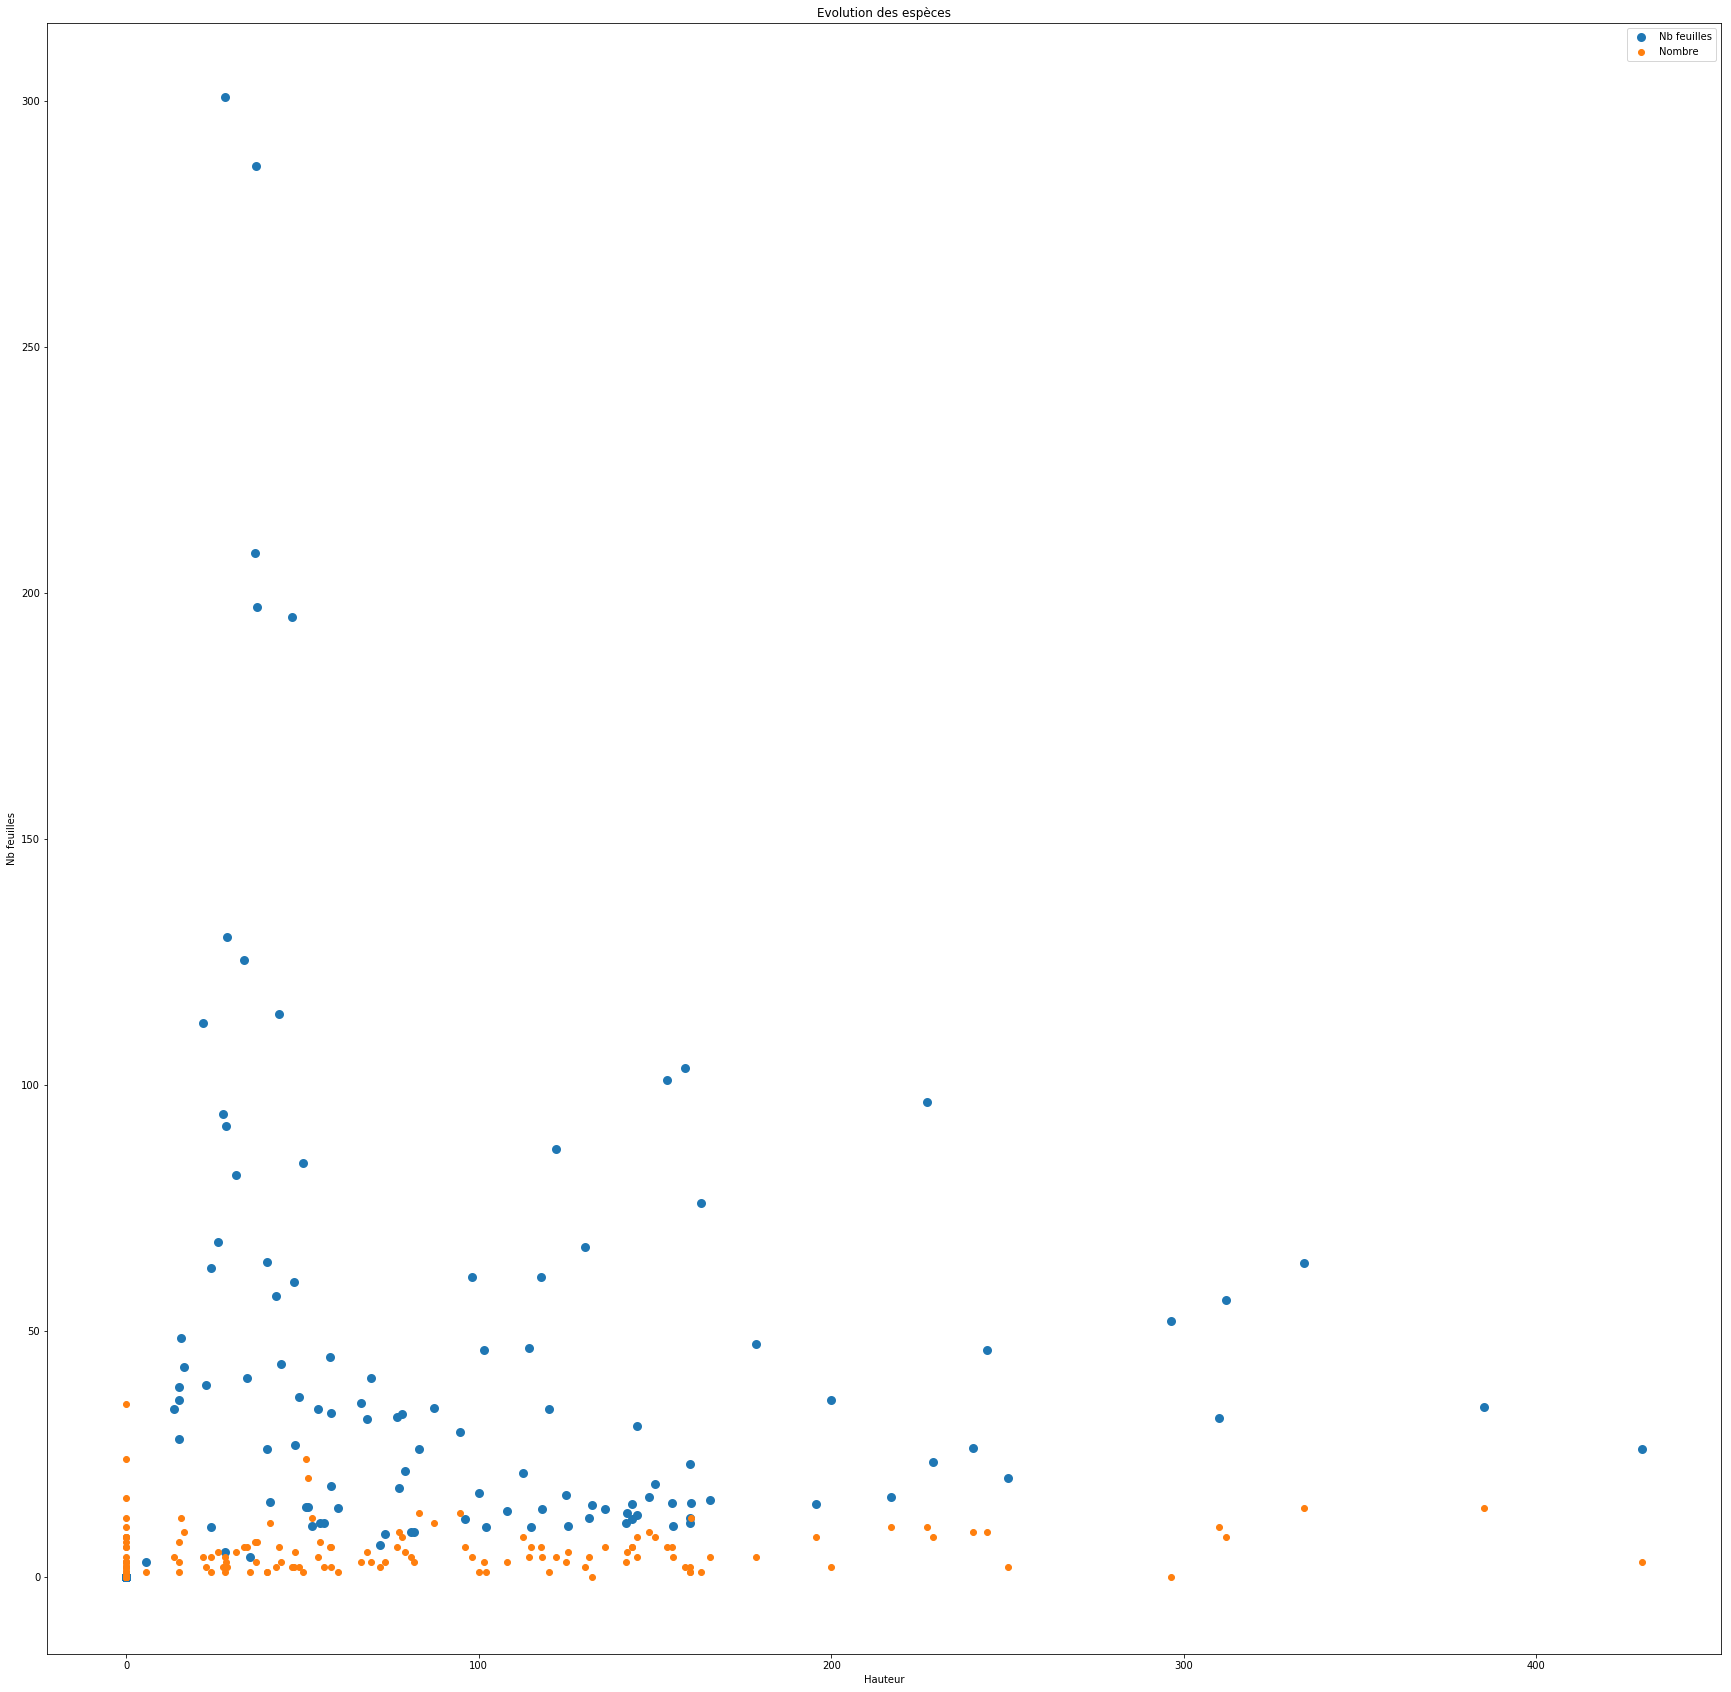

In [153]:

# Tracer des graphiques
plt.rcParams['figure.figsize'] = (30, 30)

#Nb feuilles en fonction de la hauteur des plantes
plt.scatter( df1['Moyenne Hauteur'], df1['Moyenne Nf'], label='Nb feuilles', linewidth = 3) 
#Nombre des plantes en fonction de la hauteur des plantes
plt.scatter(df1['Moyenne Hauteur'], df1['Nombre'], label='Nombre') 
#plt.plot(df['Date'], df['Nombre'], label='Nombre') 

plt.xlabel('Hauteur') 
plt.ylabel('Nb feuilles') 
plt.title('Evolution des espèces') 
#plt.grid(True) 
plt.legend()

#fig, axes = plt.subplots(2,2) 
#axes[0,0].hist(df['Hauteur'],bins = 50)


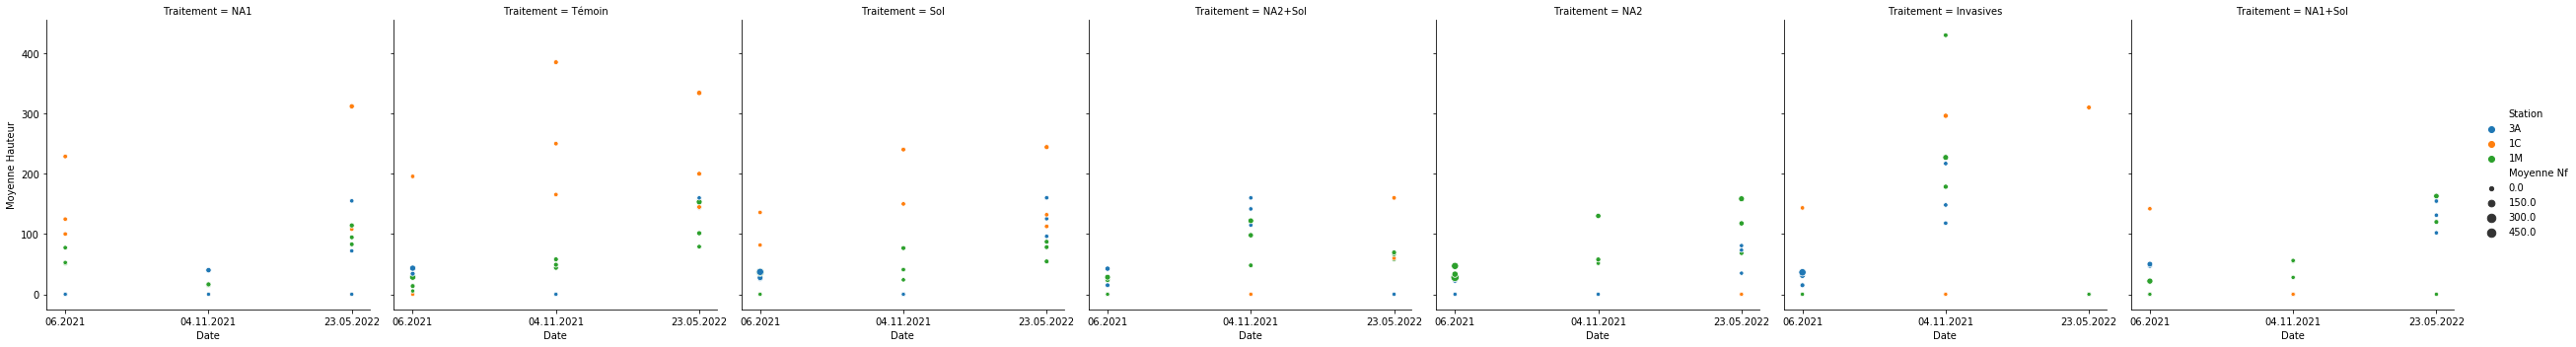

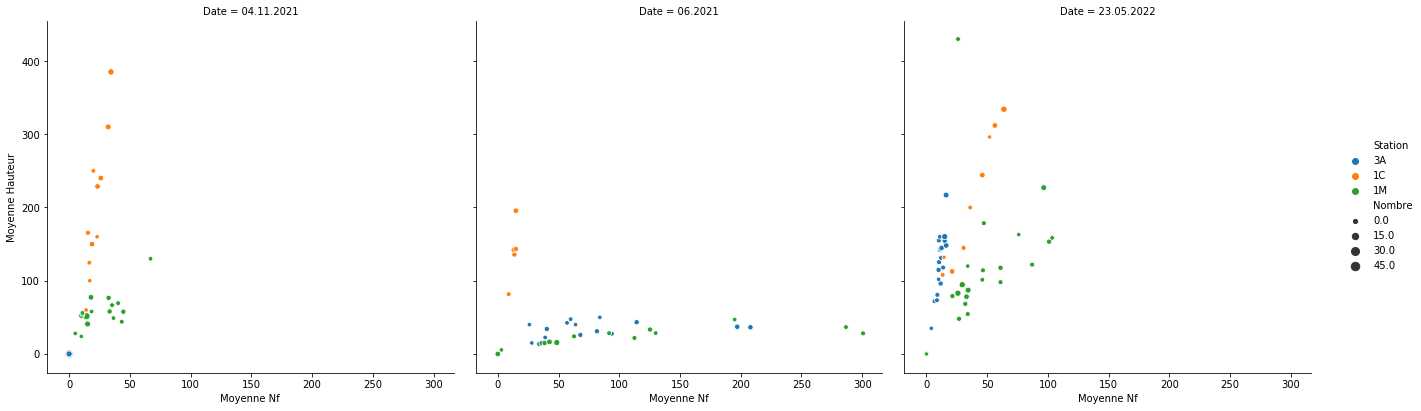

In [154]:
sns.relplot(x='Date', y='Moyenne Hauteur', hue='Station', size='Moyenne Nf', col='Traitement', data=df1)

g = sns.relplot(x='Moyenne Nf', y='Moyenne Hauteur', hue='Station', size='Nombre', col='Date', data=df1, kind="scatter")
g.fig.set_size_inches(20, 6)


#### Etude de la corrélation entre les différentes variables 

The correlation DataFrame is:
                      Nombre  Moyenne Hauteur  Moyenne Nf  Ecart-type Hauteur  \
Nombre              1.000000         0.271450    0.095923            0.001320   
Moyenne Hauteur     0.271450         1.000000    0.178525           -0.082104   
Moyenne Nf          0.095923         0.178525    1.000000            0.606466   
Ecart-type Hauteur  0.001320        -0.082104    0.606466            1.000000   
Ecart-type Nf      -0.006442        -0.069323    0.701726            0.866036   

                    Ecart-type Nf  
Nombre                  -0.006442  
Moyenne Hauteur         -0.069323  
Moyenne Nf               0.701726  
Ecart-type Hauteur       0.866036  
Ecart-type Nf            1.000000   

                      Nombre  Moyenne Hauteur  Moyenne Nf  Ecart-type Hauteur  \
Nombre              1.000000         0.271450    0.095923            0.001320   
Moyenne Hauteur     0.271450         1.000000    0.178525           -0.082104   
Moyenne Nf          0.

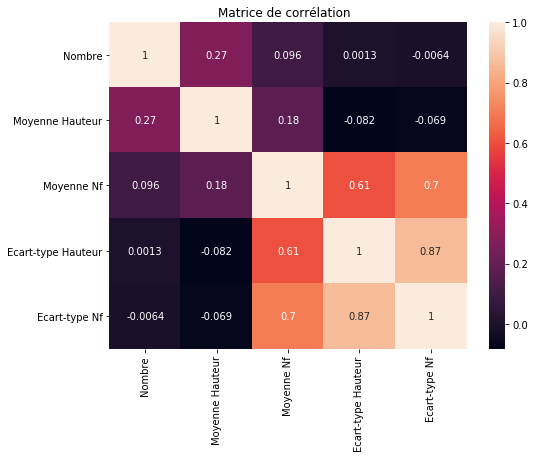

In [155]:
corr_df = df.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

corr_df1 = df.corr(method='pearson')
print(corr_df1)
plt.figure(figsize=(8, 6))
plt.title("Matrice de corrélation  ")
sns.heatmap(corr_df, annot=True)
plt.show()

On observe une corrélation négative assez élevé entre les Métrique nombre et Hauteur. Cela suggère que ces deux métriques évoluent dans des directions opposées (les valeurs d'une variable tendent à augmenter lorsque celles de l'autre variable diminuent).

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


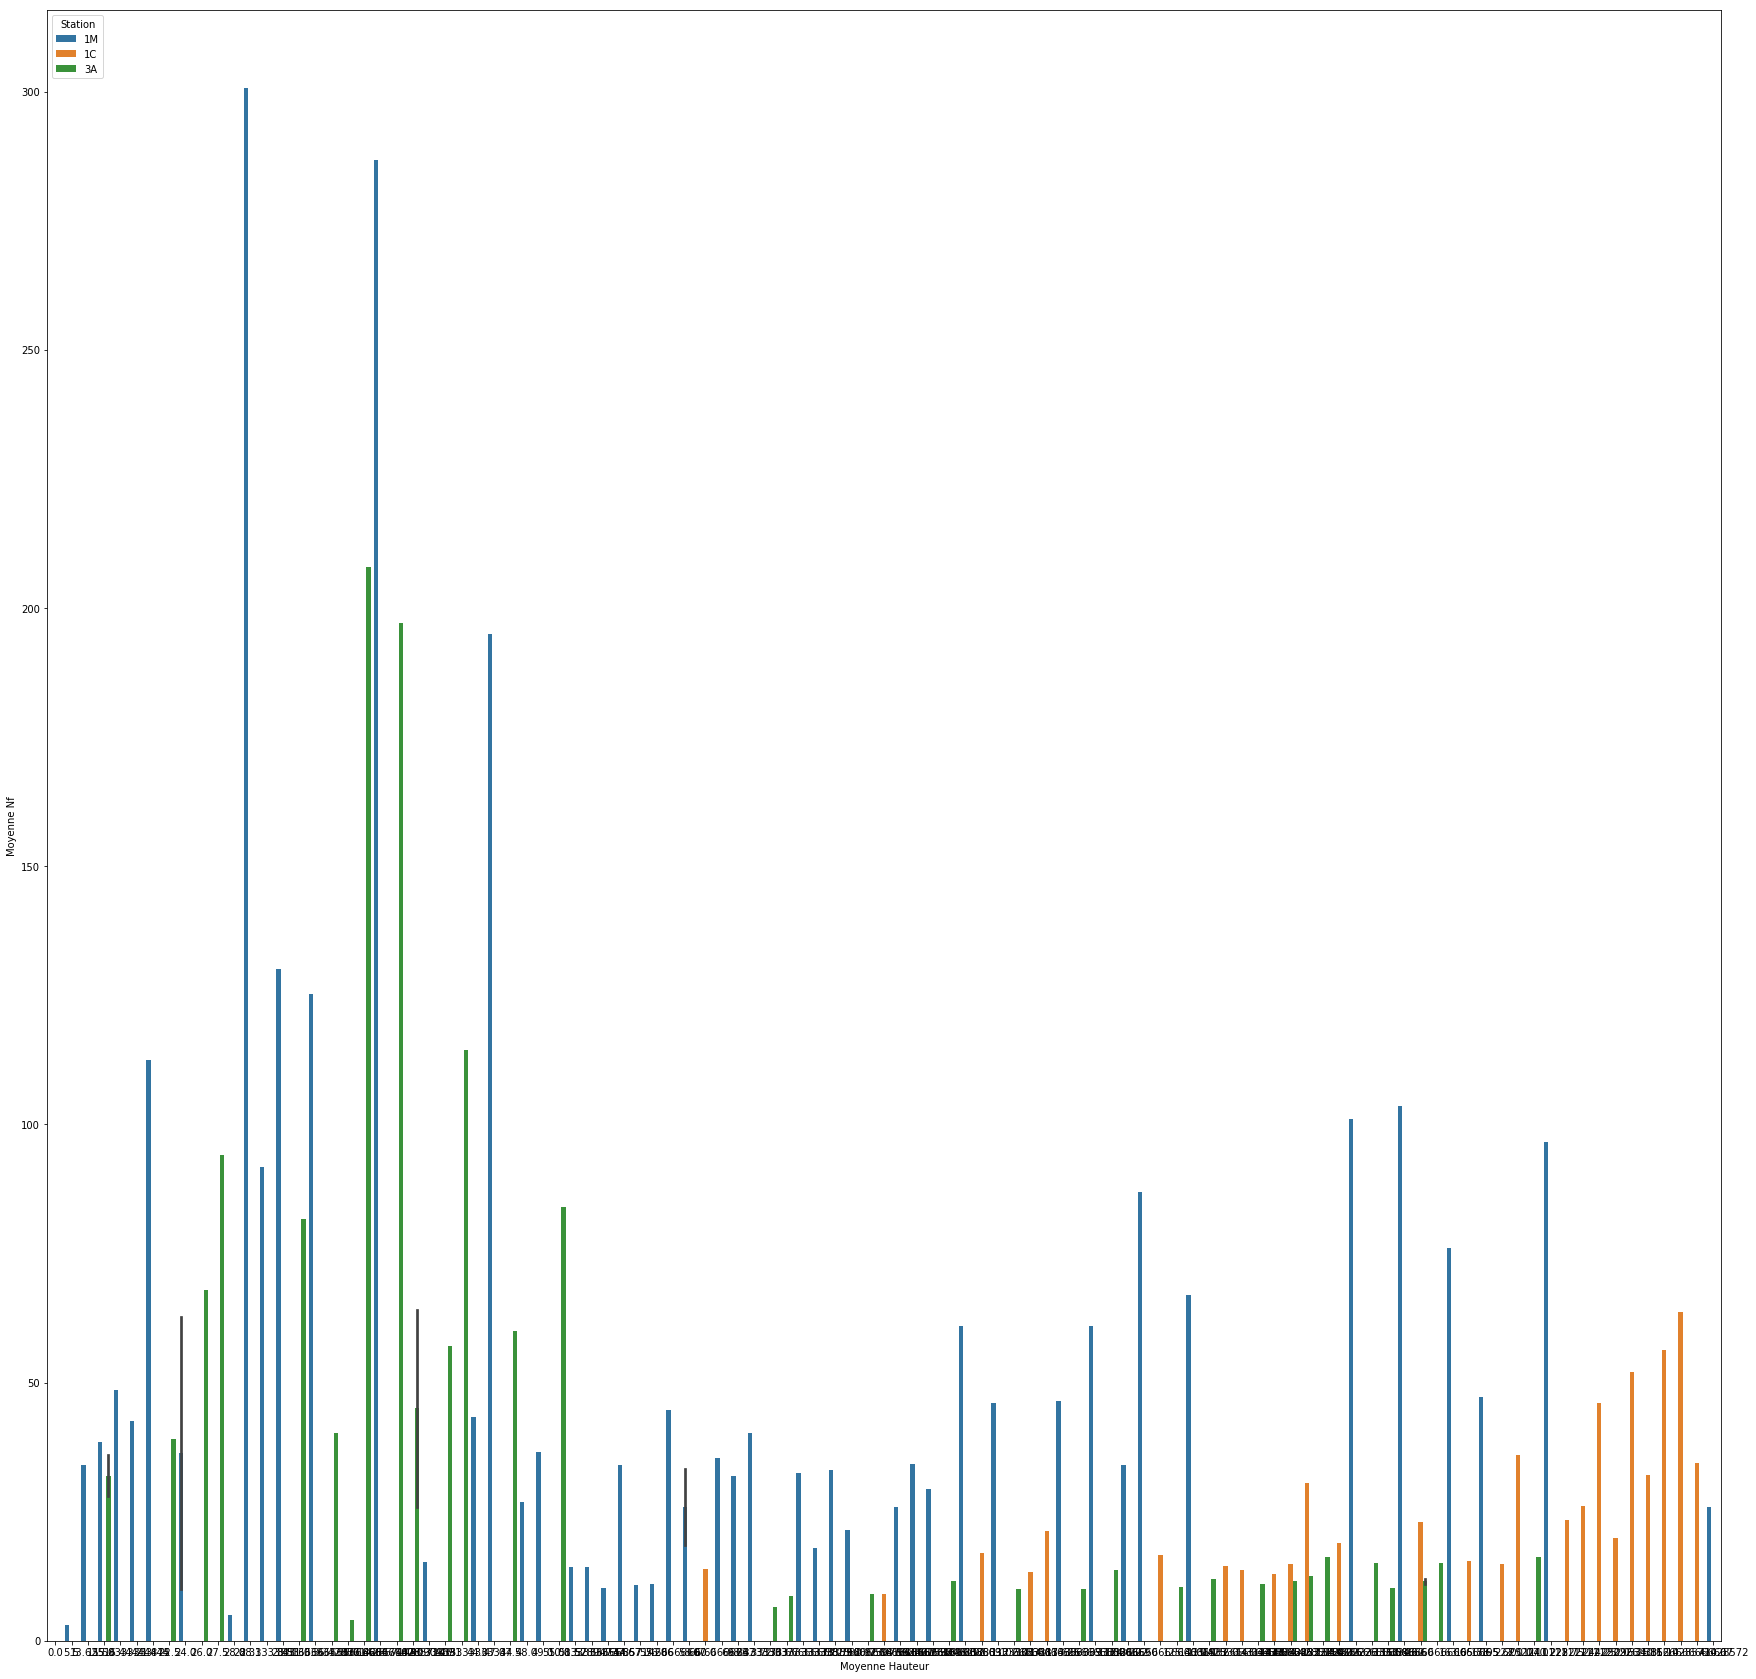

In [156]:
#Divide the dataset

X = df.iloc[ : ,[0,1,2,3]]
Y = df.iloc[ : , [4,5,6]]
X,Y


## Diagramme en barre
sns.barplot(x='Moyenne Hauteur',y='Moyenne Nf', data=df,
            hue='Station',linewidth = 5)
plt.show()




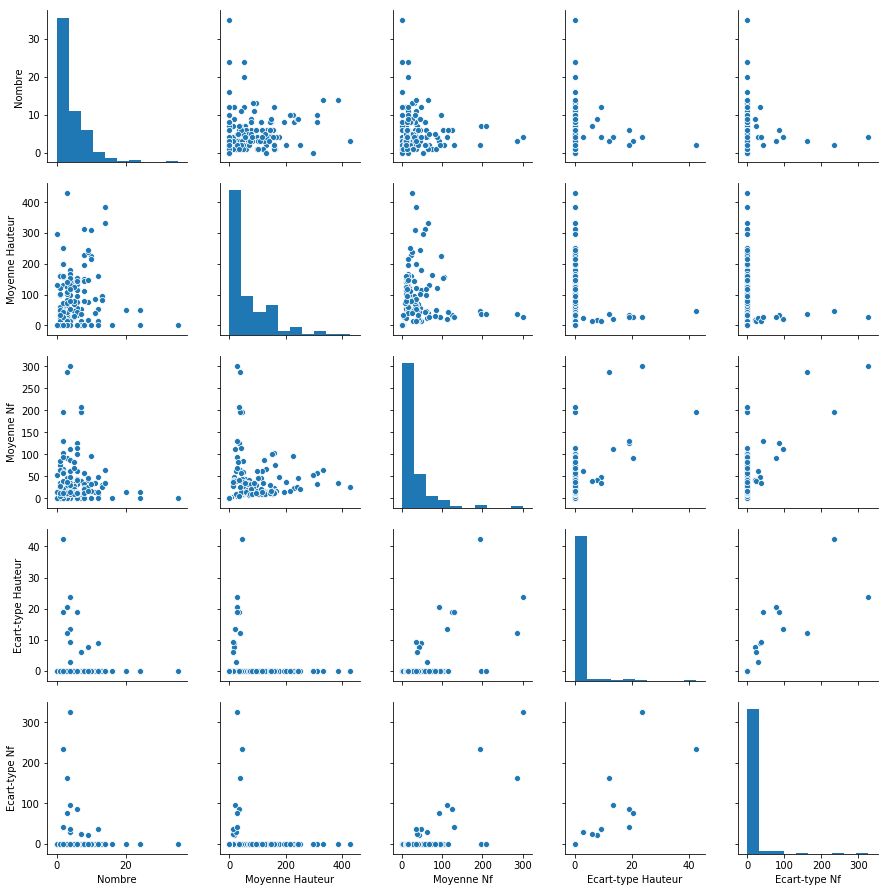

In [141]:
# Graphiques 2D pour chaque paires de colonne
sns.pairplot(df)

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


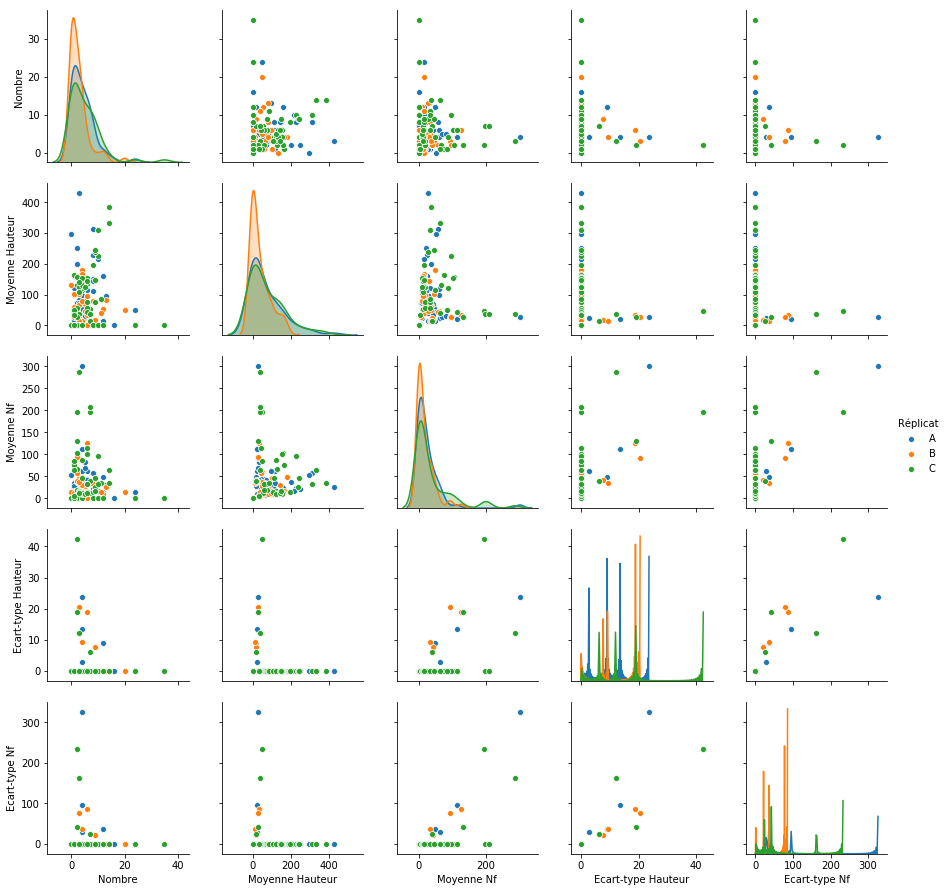

In [142]:
# Graphiques 2D pour chaque paires de colonnes par réplicat
sns.pairplot(df,hue='Réplicat')

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Durel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


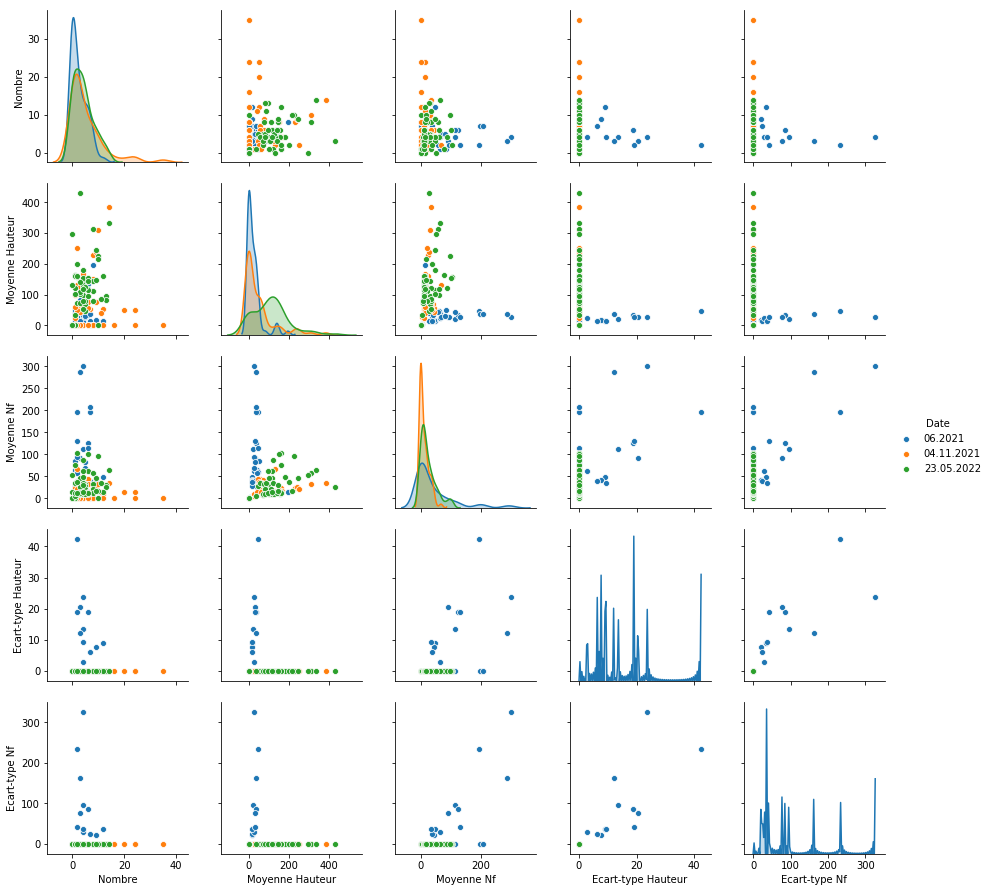

In [143]:
# Graphiques 2D pour chaque paires de colonnes par Date
sns.pairplot(df,hue='Date')

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Durel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


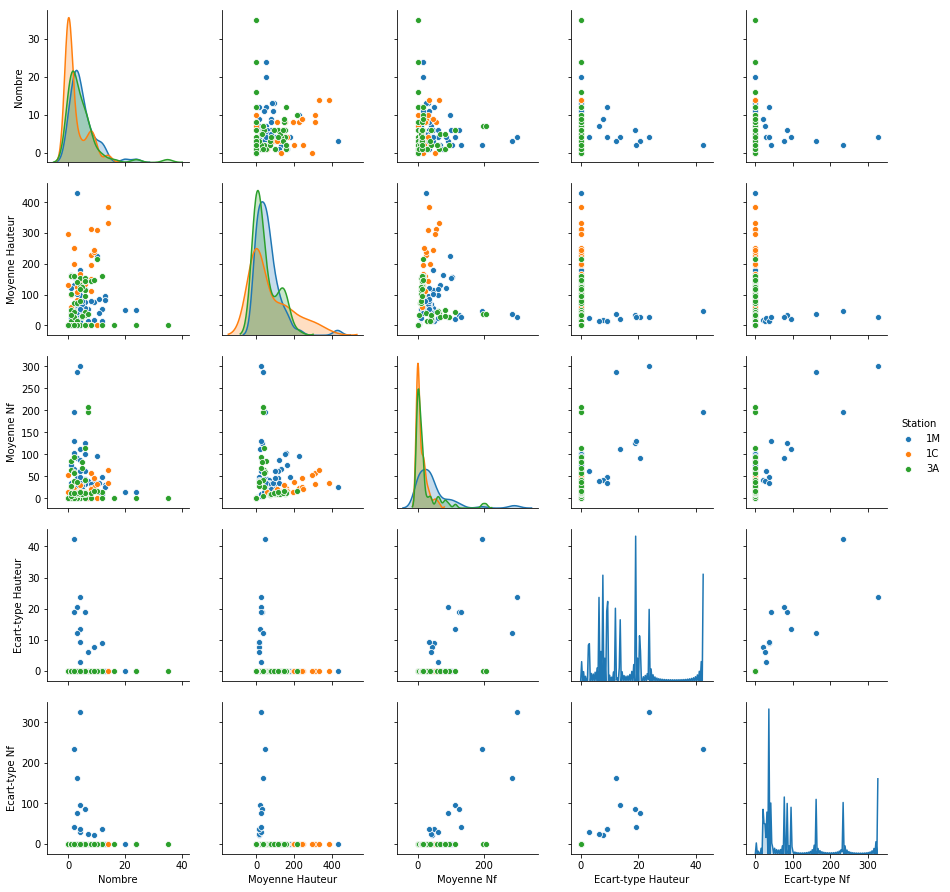

In [144]:
# Graphiques 2D pour chaque paires de colonnes par Station
sns.pairplot(df,hue='Station')

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Durel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


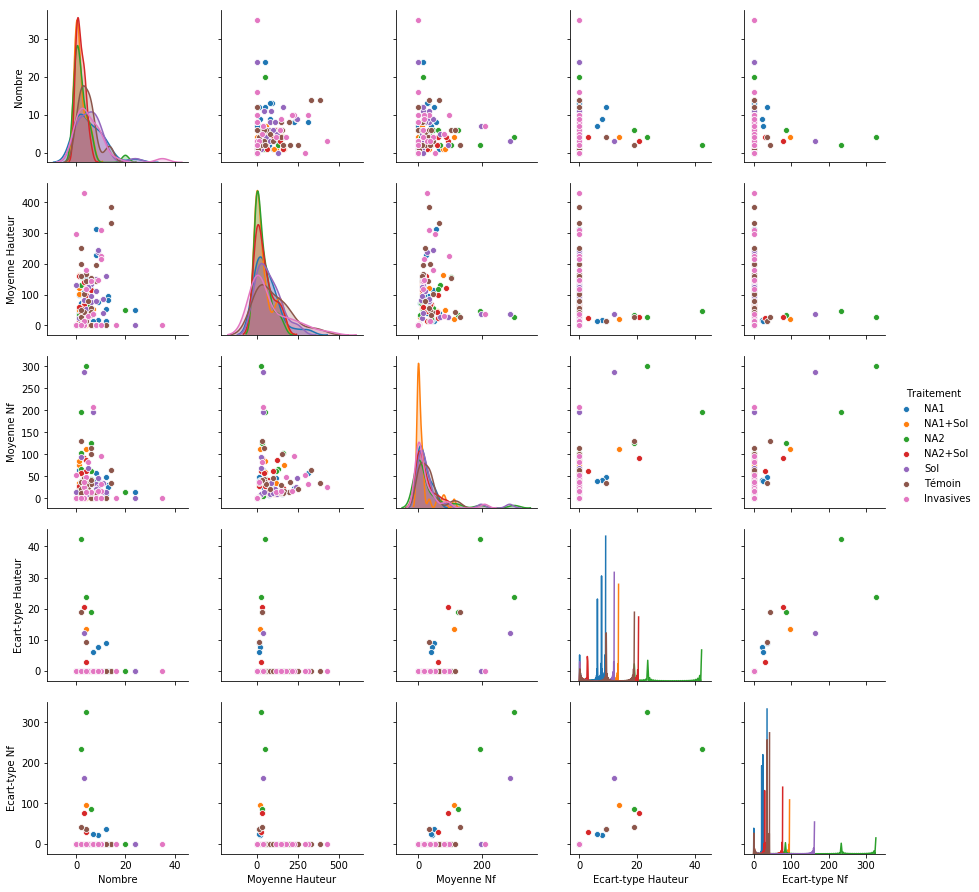

In [145]:
# Graphiques 2D pour chaque paires de colonnes par Traitement
sns.pairplot(df,hue='Traitement')